## Analysing channel flow data

In [2]:
import xarray
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import scipy

In [3]:
file_name = '1080x256_150_seconds_inner_1'
ds = xarray.open_dataset(f'./datasets/'+ file_name +'.nc', chunks={'time': '100MB'})


In [9]:
ds = ds.isel(sample=0)

In [10]:
outer_steps = len(ds.time)
outer_steps

40499

In [11]:
total_sim_time = max(ds.time.values)
total_sim_time

149.9962962962963

In [3]:
def vx_at_x_upper_boundary(ds):
  return ds.u.isel(x=-1)  # slice operator

p = ds.pipe(vx_at_x_upper_boundary).plot(hue='time')

In [4]:
# ## plot u
# fig, axs = plt.subplots(8,5, figsize=(15, 8), facecolor='w', edgecolor='k')
# fig.subplots_adjust(hspace = .5, wspace=.5)

# axs = axs.ravel()


# for i in range(outer_steps):
#     u = ds.u[i]
#     xarray.plot.pcolormesh(u, 'x', 'y',cmap=seaborn.cm.rocket, col_wrap=4,ax=axs[i],robust=True);

In [5]:
# ## plot v
# fig, axs = plt.subplots(4,5, figsize=(15, 8), facecolor='w', edgecolor='k')
# fig.subplots_adjust(hspace = .5, wspace=.5)

# axs = axs.ravel()


# for i in range(outer_steps):
#     v = ds.v[i]
#     xarray.plot.pcolormesh(v, 'x', 'y',cmap=seaborn.cm.rocket, col_wrap=4,ax=axs[i],robust=True);

In [6]:
# fig, axs = plt.subplots(1,1, figsize=(15, 8), facecolor='w', edgecolor='k')

# xarray.plot.pcolormesh(ds.u[0], 'x', 'y',cmap=seaborn.cm.rocket,robust=True, ax = axs);

In [ ]:
## calculate and plot vorticity
def vorticity(ds):
  return (ds.v.differentiate('x') - ds.u.differentiate('y')).rename('vorticity')

(ds.pipe(vorticity)
 .plot.imshow(col='time', cmap=seaborn.cm.icefire, robust=True, col_wrap=5));

In [ ]:
## quiver plot of velocity
fig, axs = plt.subplots(4,5, figsize=(17, 13), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .4, wspace=.5)

axs = axs.ravel()
for i in range(outer_steps):
    ds_plot = ds.isel(time=i)
    downsample_factor = 4 #divides by this
    ds_plot = ds_plot.coarsen(x=downsample_factor*2).mean().coarsen(y=downsample_factor).mean()
    ds_plot.plot.quiver(x='x', y='y', u='u', v='v', ax = axs[i], infer_intervals=True)

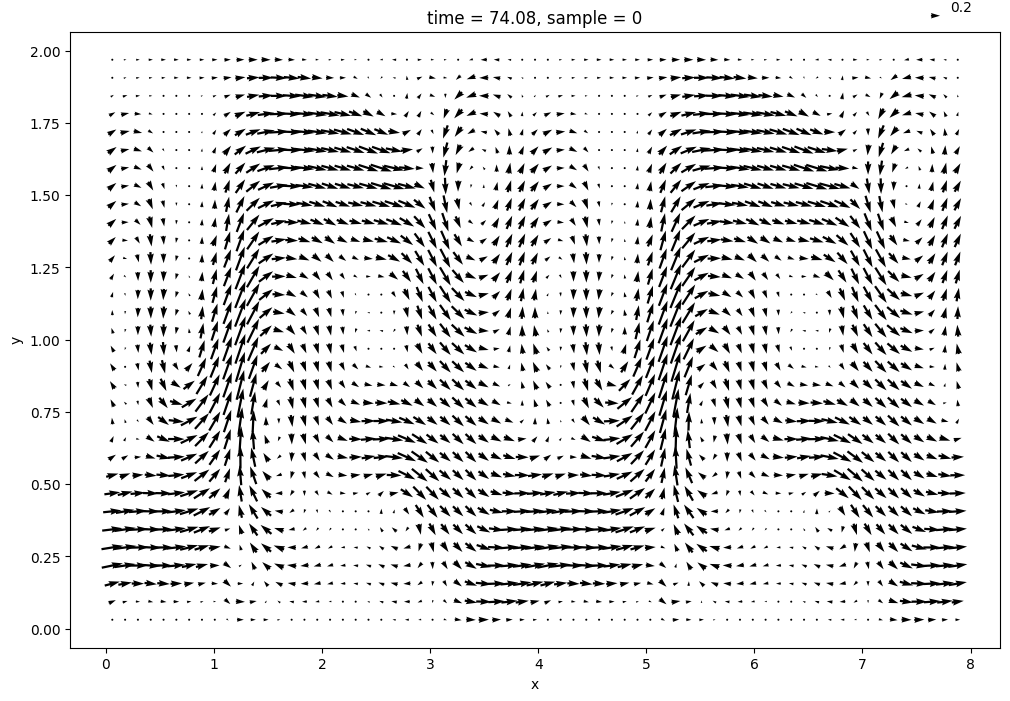

In [30]:
fig, axs = plt.subplots(1,1, figsize=(12, 8), facecolor='w', edgecolor='k')

#xarray.plot.pcolormesh(ds.u[19], 'x', 'y',cmap=seaborn.cm.rocket,robust=True, ax = axs);

ds_plot = ds.isel(time=20000) ## change this depending on what we want to plot

downsample_factor = 8 #divides by this
ds_plot = ds_plot.coarsen(x=downsample_factor*2, boundary="trim").mean().coarsen(y=downsample_factor, boundary="trim").mean()

ds_plot.plot.quiver(x='x', y='y', u='u', v='v', ax = axs, infer_intervals=True)

In [ ]:
# def vel_at_middle_of_channel(ds, ySize,xSize):
#     return ds.isel(x= int(np.floor(xSize/3))).isel(y= int(np.floor(ySize/3)))

# ySize = len(ds.y.values)
# xSize = len(ds.x.values)

# du = ds.u
# u = du.pipe(vel_at_middle_of_channel,ySize,xSize)
# dv = ds.v
# v = dv.pipe(vel_at_middle_of_channel,ySize,xSize)


In [ ]:
# fig, axs = plt.subplots(1,1, figsize=(15, 8), facecolor='w', edgecolor='k')

# xarray.plot.pcolormesh(ds.u, 'x', 'y',cmap=seaborn.cm.rocket,robust=True, ax = axs);

In [ ]:
ds.isel(time=7000).u.values

In [ ]:
outer_steps

In [ ]:
# filtering
u = u[:6100]
v = v[:6100]
total_sim_time = total_sim_time*(6100/10000)

In [ ]:
total_sim_time

In [ ]:
(outer_steps/total_sim_time)/2

In [1]:
#welch's method
f, Pxx_den = scipy.signal.welch(u,(outer_steps/total_sim_time))
plt.loglog(f, Pxx_den)
#plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

NameError: name 'scipy' is not defined

In [ ]:
#welch's method
f, Pxx_den = scipy.signal.welch(v,(outer_steps/total_sim_time))
plt.loglog(f, Pxx_den)
#plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [ ]:
#welch's method for kinetic energy
ek = np.sqrt((u**2 + v**2))
f, Pxx_den = scipy.signal.welch(ek,(outer_steps/total_sim_time))
plt.loglog(f, Pxx_den)
#plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [ ]:
ds

In [ ]:
## plot grid

x = ds.x.values.flatten()
y = ds.y.values.flatten()

xgrid,ygrid = np.meshgrid(x,y)

In [ ]:
plt.figure(figsize=(13, 8))
plt.scatter(xgrid,ygrid,1)
plt.show()